# Projet numérique : câble sous-marin

### Questions théoriques

**Question 1 :**

Il s'agit de la loi forte des grands nombres.

**Question 2 :**

On note $\mathbf{Z_{obs}}=(Z(x_{j_{1}}),\dots,Z(x_{j_{n}}))$ et $\mathbf{Z_{inc}}$ le vecteur des composantes de Z correspondant aux points de discrétisation sans observation.

Notons $m_{Z_{obs}}$ et $m_{Z_{inc}}$ leur espérance (qui n'ont que $\mu$ pour composante).

Notons $\mathbf{Z_{ord}}$ le vecteur de $\mathbb{R}^{N+1}$ ayant pour composante celles de $\mathbf{Z_{inc}}$ puis celles de $\mathbf{Z_{obs}}$ (dans cet ordre précis). $\mathbf{Z_{ord}}=((Z(x_{0}),\dots,Z(x_{N}),Z(x_{j_{1}}),\dots,Z(x_{j_{n}}))$ (sans doublons).

Notons C la matrice de covariance de $\mathbf{Z_{ord}}$. Alors :

\begin{equation*} C = \left(\begin{array}{cc} C_{Z_{inc}} & C_{Z_{inc},Z_{obs}} \\ C_{Z_{obs},Z_{inc}}& C_{Z_{obs}} \end{array}\right) \end{equation*}

Où $C_{Z_{inc}} \; $ et $ \;  C_{Z_{obs}}$ sont respectivement les matrices de covariances de $\mathbf{Z_{inc}}$ et $\mathbf{Z_{obs}}$, $C_{Z_{inc},Z_{obs}} = Cov(\mathbf{Z_{inc}},\mathbf{Z_{obs}})$ et $C_{Z_{obs},Z_{inc}} = Cov(\mathbf{Z_{obs}},\mathbf{Z_{inc}})$.

Alors, d'après le cours, la variable aléatoire $\mathbf{Z_{inc}}|\mathbf{Z_{obs}}=z$ suit une loi gaussienne d'espérance $m_{Z_{inc}|Z_{obs}=z} = m_{Z_{inc}} + C_{Z_{inc},Z_{obs}}C_{Z_{obs}}^{-1}(z-m_{Z_{obs}})$ et de matrice de covariance $C_{Z_{inc}|Z_{obs}=z} = C_{Z_{inc}}-C_{Z_{inc},Z_{obs}}C_{Z_{obs}}^{-1}C_{Z_{obs},Z_{inc}}$.

**Question 3 :** Y est gaussien comme combinaison linéaire de variables aléatoires gaussiennes.

Par linéarité de l'espérance, $E(Z) = E(m + RY) = m + RE(Y) = m$.

Et $V(Z)=V((m + RY)(m + RY)^{t}) = RR^{t}$


**Question 4 :**

**1ère étape** : Matrices de covariances

On calcule les matrices de covariances de $\mathbf{Z_{inc}}$, de $\mathbf{Z_{obs}}$ et $Cov(\mathbf{Z_{inc}},\mathbf{Z_{obs}})$

On peut ainsi calculer $C_{Z_{inc}|Z_{obs}=z}$

**2ème étape** : Simulation de $\mathbf{Z_{inc}}|\mathbf{Z_{obs}}=z$

On commence par simuler N+1-n variables aléatoires gaussiennes centrées réduites à l'aide de la méthode de Box-Muller. Notons par exemple Y le vecteur aléatoire (gaussien) ayant pour composante chacune de ces variables aléatoires.

On détermine la décomposition (de Cholesky par exemple) de $C_{Z_{inc}|Z_{obs}=z}=RR^{t}$

**3ème étape** : Conclusion

À l'aide de R et Y, la question 3 nous permet alors de construire $\mathbf{Z_{inc}}|\mathbf{Z_{obs}}=z$

### Questions pratiques

**Définition des données et du code**

In [10]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt

In [11]:
#Discretisation
A, B, N = 0, 500, 101
Delta = (B-A)/(N-1)
discretization_indexes = np.arange(N)
discretization = discretization_indexes*Delta

#Parametres du modele
mu = -5
a = 50
sigma2 = 12

#Donnees
observation_indexes = [0, 20, 40, 60, 80, 100]
depth = np.array([0, -4, -12.8, -1, -6.5, 0])

#Indices des composantes correspondant aux observations et aux composantes non observees
unknown_indexes = list(set(discretization_indexes) - set(observation_indexes))

**Question 1**

In [12]:
def cov(dist, a, sigma2):
    SIGMA = np.zeros(np.shape(dist))
    for i in range(len(dist)):
        for j in range(len(dist[0])):
            SIGMA[i][j] = sigma2*np.exp(-abs(dist[i][j])/a)
    return(SIGMA)

**Question 2**

In [13]:
def distance(discretization):
    t = len(discretization)
    dist = np.zeros((t,t))
    for i in range(1,t):
        for j in range(1,t):
            dist[i][j] = discretization[i] - discretization[j]
    return(dist)    

**Question 3**

In [14]:
SIGMA = cov(distance(discretization), a, sigma2)

**Question 4**

In [15]:
inconnues_indexes = np.array(sorted(list(set(discretization_indexes) - set(observation_indexes))))
cov_obs = np.array([[SIGMA[i][j] for j in observation_indexes] for i in observation_indexes])
cov_inc = np.array([[SIGMA[i][j] for j in inconnues_indexes] for i in inconnues_indexes])
cov_inc_obs = np.array([[SIGMA[i][j] for j in observation_indexes] for i in inconnues_indexes]) ## Il s'agit de Cov(Zobs,Zinc)


**Question 5** Dans le cas où on cherche l'espérance conditionnelle des composantes non observées connaissant les observations, si on note Y le vecteur des composantes non observées et Z celui des composantes observées, l'espérance conditionnelle de Y sachant Z est la variable aléatoire $m_Y + C_{Y,Z}C_Z^{-1}(Z-m_Z)$ avec $C_{Y,Z} = Cov(Y,Z)$, $C_Z = Cov(Z,Z)$ et $m_Y = \mathbb{E}(Y)$.
En reprenant les notations précédentes, $C_Z = cov\_obs$, $m_Y = m_Z = \mu$.

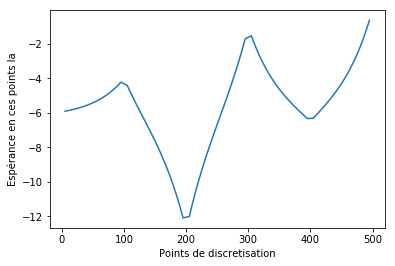

In [44]:
mY,mZ = np.array([mu]*(len(discretization_indexes)- len(observation_indexes))).T, np.array([mu]*len(observation_indexes)).T
Z = depth.T
CZ = cov_obs
CYZ = cov_inc_obs
D = np.array(Z - mZ)

#Calcul de l'esperance conditionnelle a l'aide de la formule precedente
EY = mY + CYZ.dot(np.linalg.inv(CZ)).dot(D)
Y = np.array([discretization[i] for i in inconnues_indexes])

#Representation des donnees
plt.plot(Y, EY)
plt.xlabel('Points de discretisation')
plt.ylabel('Espérance en ces points la')
plt.show()

**Question 6** La matrice de covariance de la variable aléatoire $Y|Z=z$ est $C_Y - C_{Y,Z}C_Z^{-1}C_{Z,Y}$

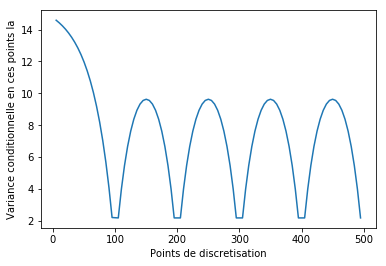

In [45]:
CY = cov_inc
M = CY - CYZ.dot(np.linalg.inv(CZ)).dot(CYZ.T)
DIAG = np.array([M[i][i] for i in range(len(M))])
plt.plot(Y, DIAG)
plt.xlabel('Points de discretisation')
plt.ylabel('Variance conditionnelle en ces points la')
plt.show()

Commentaire : à tous les points connus (0, 100, 200, 300, 400, 500), la variance est nulle (logique vu qu'on connaît les points). En revanche, plus on s'éloigne de ces points de connaissance, et moins précis le résultat est, d'où une augmentation de la variance entre deux points connus.

**Question 7**

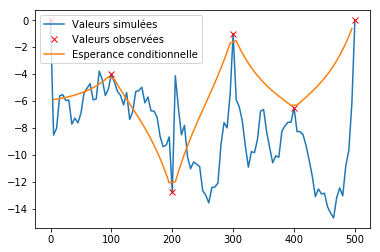

In [47]:
## Méthode de Box-Muller pour simuler N+1-n variable aléatoires gaussiennes centrée réduites

def simulation():

    Z0 = np.zeros(len(discretization_indexes)-len(observation_indexes))
    U = np.zeros(len(discretization_indexes)-len(observation_indexes))
    V = np.zeros(len(discretization_indexes)-len(observation_indexes))

    for i in range(0,len(discretization_indexes)-len(observation_indexes)):
        ## Python peut générer un réel de [0;1[ de manière uniforme à l'aide de random.random(). Pour que U et V soient dans ]0;1[, on écrit
        U[i] = (random.random()-random.random()+1)/2
        V[i] = (random.random()-random.random()+1)/2
    Z0 = np.sqrt(-2*np.log(U))*np.cos(2*np.pi*V)
    R = np.linalg.cholesky(M)
    Zinc_simu = (mY + R.dot(Z0)).tolist()
    Z_simu = [0] + Zinc_simu[0:19] + [-4] + Zinc_simu[19:38] + [-12.8] + Zinc_simu[38:57] + [-1] + Zinc_simu[57:76] + [-6.5] + Zinc_simu[76:95] + [0]
    return(Z_simu)

Z_simu = simulation()

plt.plot(discretization, Z_simu, label="Valeurs simulées")
plt.plot(np.array(observation_indexes)*Delta, depth, 'rx', label='Valeurs observées')
plt.plot(Y,EY, label='Esperance conditionnelle')
plt.legend()
plt.show()

Commentaire :

**Question 8**

In [19]:
def longueur(liste_profondeur, pas):
    L = []
    for p in liste_profondeur:
        S=0
        for i in range(1, len(p)): S += np.sqrt(pas**2 + (p[i] - p[i-1])**2)
        L.append(S)
    return L

**Question 9**

In [20]:
simulations = [simulation() for i in range(100)]
longueurs = longueur(simulations, Delta)

#Calcul de l'esperance conditionnelle (estimee) de la longueur
Lcond = sum(longueurs)/100
print(f"Esperance conditionnelle estimee de la longueur : {Lcond}")

#Calcul de la longueur de l'esperance conditionnelle
LEY = sum(longueur([EY], Delta))
print(f"Longueur de l'esperance conditionnelle : {LEY}")

Esperance conditionnelle estimee de la longueur : 534.0971342505387
Longueur de l'esperance conditionnelle : 471.31297042997704


On remarque que 

**Question 10** On a si on note $L_i$ la longueur de la ième simulation, $M_n = \frac{\sum_{i=1}^n L_i}{n}$.

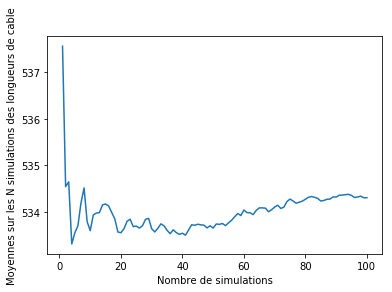

In [48]:
#Nombre max de simulations
Nmax = 100

def moyennes(Nmax):
    
    simulations = [simulation() for k in range(Nmax)]
    
    #Calcul des longueurs pour chaque simulation
    longueurs = longueur(simulations, Delta)

    #Utilisation de la formule donnee ci dessus
    M = []
    sommelongueurs = 0
    for k in range(Nmax):
        sommelongueurs += longueurs[k]
        M += [sommelongueurs/(k+1)]
    
    #Representation des donnees
    N = np.arange(Nmax) + 1
    plt.plot(N,M)
    plt.xlabel("Nombre de simulations")
    plt.ylabel("Moyennes sur les N simulations des longueurs de cable")
    plt.show()

moyennes(Nmax)

Commentaire :

**Question 11**

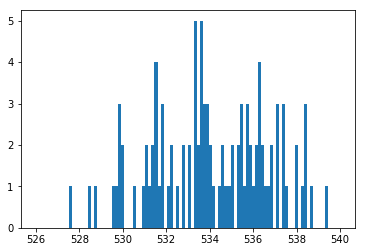

In [37]:
#Creation de l'histogramme
hist = plt.hist(longueurs, range = (int(min(longueurs)) - 1, int(max(longueurs)) + 1), bins = Nmax)
plt.show()

**Question 12**

In [50]:
def intervalle_confiance_95_1():
    return(None)

def intervalle_confiance_95_2():
    return(None)

**Question 13**

In [49]:
def estimation(longueurs):
    #Pour estimer la probabilite, il suffit de compter le nombre de longueurs qui depassent 525m et de diviser par le nombre total de longueurs
    compt = [1 if el >= 525 else 0 for el in longueurs]
    return(sum(compt)/len(compt))

**Question 14**

Esperance conditionnelle estimee de la longueur pour 1000 simulations : 5340.602139050902
Longueur de l'esperance conditionnelle pour 1000 simulations : 471.31297042997704
Suite des moyennes pour 1000 simulations :


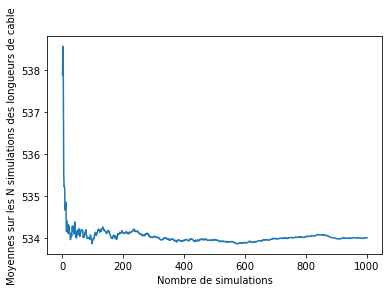

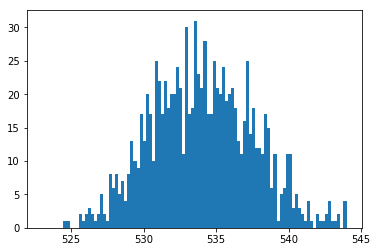

Esperance conditionnelle estimee de la longueur pour 10000 simulations : 53396.34743078649
Longueur de l'esperance conditionnelle pour 10000 simulations : 471.31297042997704
Suite des moyennes pour 10000 simulations :


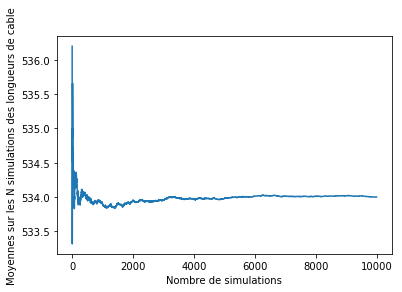

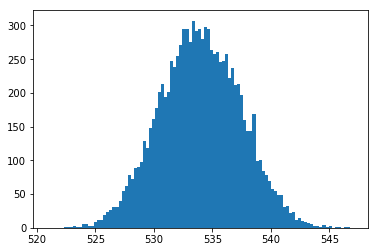

Esperance conditionnelle estimee de la longueur pour 100000 simulations : 533973.9963908575
Longueur de l'esperance conditionnelle pour 100000 simulations : 471.31297042997704
Suite des moyennes pour 100000 simulations :


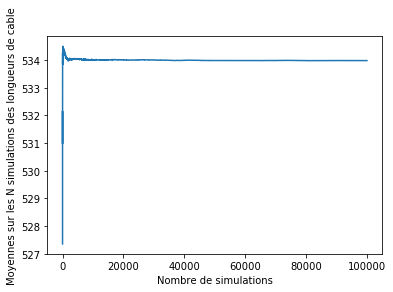

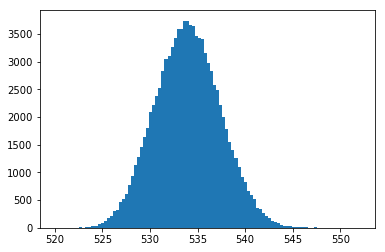

In [38]:
N = [1000, 10000, 100000]
for n in N:
    simulations = [simulation() for i in range(n)]
    longueurs = longueur(simulations, Delta)
    
    #Calcul de l'esperance conditionnelle (estimee) de la longueur
    Lcond = sum(longueurs)/100
    print(f"Esperance conditionnelle estimee de la longueur pour {n} simulations : {Lcond}")
    #Calcul de la longueur de l'esperance conditionnelle
    LEY = sum(longueur([EY], Delta))
    print(f"Longueur de l'esperance conditionnelle pour {n} simulations : {LEY}")
    print('____________________________________________________________________________________________________')
    
    print(f"Suite des moyennes pour {n} simulations :")
    moyennes(n)
    print('____________________________________________________________________________________________________')
    
    print(f"Histogramme pour {n} simulations :")
    hist = plt.hist(longueurs, range = (int(min(longueurs)) - 1, int(max(longueurs)) + 1), bins = Nmax)
    plt.show()
    print('____________________________________________________________________________________________________')
    
    proba525 = estimation(longueurs)
    print(f"Estimation de la probabilite que la longueur du cable depasse 525m pour {n} simulations : {proba525}")

Commentaire :